![Astrofisica Computacional](../../../logo.png)

---
## 05. Introduction to `Pandas`

Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### About this notebook

In this notebook we present an introduction to the package `pandas`

---

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as ml
import sys

plt = ml.pyplot # matplotlib.pyplot as plt
# Defines the figure size for all the notebook
ml.rcParams['figure.figsize'] = (10.0, 5.0) 


rng = np.random.default_rng(413)  # Initialise our random number generator

## The `Dataframe` in `Pandas`

In [2]:
data = [10., 15., 30., 75.]
pd.DataFrame(data)

,0
0,10.0
1,15.0
2,30.0
3,75.0


In [7]:
# Some data about planets
# mass in [Earth masses]
# orbital period in [Earth years]
# mean distance tu Sun in [au]

data = {'name': ['Earth', 'Mars', 'Jupiter'],
        'mass': [1., 0.107, 317.8],
        'period': [1., 1.88, 11.86],
        'distance': [1., 1.5, 5.2]}
data

{'name': ['Earth', 'Mars', 'Jupiter'],
 'mass': [1.0, 0.107, 317.8],
 'period': [1.0, 1.88, 11.86],
 'distance': [1.0, 1.5, 5.2]}

In [8]:
df = pd.DataFrame(data)
df

,name,mass,period,distance
0,Earth,1.000,1.00,1.0
1,Mars,0.107,1.88,1.5
2,Jupiter,317.800,11.86,5.2


In [9]:
type(df)

pandas.core.frame.DataFrame

### Accesing Features  (`Series`)

In [10]:
df['mass']

0      1.000
1      0.107
2    317.800
Name: mass, dtype: float64

In [11]:
type(df['mass'])  

pandas.core.series.Series

In [12]:
df['mass'] * 5.972e24

0    5.972000e+24
1    6.390040e+23
2    1.897902e+27
Name: mass, dtype: float64

In [13]:
df

,name,mass,period,distance
0,Earth,1.000,1.00,1.0
1,Mars,0.107,1.88,1.5
2,Jupiter,317.800,11.86,5.2


In [14]:
df['mass (kg)'] =  df['mass'] * 5.972e24

In [15]:
df

,name,mass,period,distance,mass (kg)
0,Earth,1.000,1.00,1.0,5.972000e+24
1,Mars,0.107,1.88,1.5,6.390040e+23
2,Jupiter,317.800,11.86,5.2,1.897902e+27


In [16]:
np.log(df['distance'])

0    0.000000
1    0.405465
2    1.648659
Name: distance, dtype: float64

In [17]:
df[['mass','distance']]

,mass,distance
0,1.000,1.0
1,0.107,1.5
2,317.800,5.2


In [18]:
df1 = df[['name', 'mass (kg)','mass', 'period', 'distance']]
df1

,name,mass (kg),mass,period,distance
0,Earth,5.972000e+24,1.000,1.00,1.0
1,Mars,6.390040e+23,0.107,1.88,1.5
2,Jupiter,1.897902e+27,317.800,11.86,5.2


Generating some series using random numbers

In [19]:
s = pd.Series(rng.integers(0, 10, 10))
s

0    2
1    0
2    5
3    4
4    8
5    0
6    4
7    0
8    8
9    9
dtype: int64

We can sort the series. Note that the indices are kept the same as in the original series.

In [20]:
sorted_s = s.sort_values()
sorted_s

1    0
5    0
7    0
0    2
3    4
6    4
2    5
4    8
8    8
9    9
dtype: int64

If we multiply series s by the sorted series, the product is obtained using the indices.
    

In [21]:
s * s.sort_values() 

0     4
1     0
2    25
3    16
4    64
5     0
6    16
7     0
8    64
9    81
dtype: int64

It is also possible to reset the indices after sorting the values: 

In [22]:
new_sorted_s = s.sort_values().reset_index(drop=True)
new_sorted_s

0    0
1    0
2    0
3    2
4    4
5    4
6    5
7    8
8    8
9    9
dtype: int64

In [23]:
s * new_sorted_s

0     0
1     0
2     0
3     8
4    32
5     0
6    20
7     0
8    64
9    81
dtype: int64

## Examining a `DataFrame`

In [24]:
df

,name,mass,period,distance,mass (kg)
0,Earth,1.000,1.00,1.0,5.972000e+24
1,Mars,0.107,1.88,1.5,6.390040e+23
2,Jupiter,317.800,11.86,5.2,1.897902e+27


In [25]:
df.dtypes

name          object
mass         float64
period       float64
distance     float64
mass (kg)    float64
dtype: object

In [26]:
df.columns

Index(['name', 'mass', 'period', 'distance', 'mass (kg)'], dtype='object')

In [27]:
df.shape

(3, 5)

### Looking into the data

In [30]:
df.head(2) # First entries

,name,mass,period,distance,mass (kg)
0,Earth,1.000,1.00,1.0,5.972000e+24
1,Mars,0.107,1.88,1.5,6.390040e+23


In [31]:
df.tail(2) # Last entries

,name,mass,period,distance,mass (kg)
1,Mars,0.107,1.88,1.5,6.390040e+23
2,Jupiter,317.800,11.86,5.2,1.897902e+27


In [32]:
df.describe()

,mass,period,distance,mass (kg)
count,3.000000,3.000000,3.000000,3.000000e+00
mean,106.302333,4.913333,2.566667,6.348375e+26
std,183.162896,6.032059,2.294196,1.093849e+27
min,0.107000,1.000000,1.000000,6.390040e+23
25%,0.553500,1.440000,1.250000,3.305502e+24
50%,1.000000,1.880000,1.500000,5.972000e+24
75%,159.400000,6.870000,3.350000,9.519368e+26
max,317.800000,11.860000,5.200000,1.897902e+27


## Indexing and Slicing

There are different ways to index/slice data in pandas.

In [48]:
df[1:2]

,name,mass,period,distance,mass (kg)
1,Mars,0.107,1.88,1.5,6.390040e+23


There are two interesting methods:

In [43]:
df.loc

In [44]:
df.iloc

### Using `.loc[]`

This one treats the input as label or "row-name".

In [60]:
df.loc[0] # Index of row

name                               Earth
mass                                 1.0
period                               1.0
distance                             1.0
mass (kg)    5972000000000000327155712.0
Name: 0, dtype: object

In [63]:
df['name'].loc[0]

'Earth'

However, index \[-1\] is not defined as one may expect... 

In [ ]:
#df.loc[-1] # Note the ValueError

We can accessing multiple rows and/or columns

In [64]:
df.loc[1:3, ['name']]

,name
1,Mars
2,Jupiter


In [65]:
df.loc[[0, 2], ['name', 'period']]

,name,period
0,Earth,1.00
2,Jupiter,11.86


### Using `.iloc[]`

In [56]:
df.iloc[2]  # Index of row

name                                Jupiter
mass                                  317.8
period                                11.86
distance                                5.2
mass (kg)    1897901600000000176555032576.0
Name: 2, dtype: object

In [59]:
df.iloc[-1] # This time the index [-1] works as expected

name                                Jupiter
mass                                  317.8
period                                11.86
distance                                5.2
mass (kg)    1897901600000000176555032576.0
Name: 2, dtype: object

---
## Reading a File 

We will use, as an example, a catalog of all official named stars collected by the IAU in .csv format available at
https://www.kaggle.com/ecotner/named-stars 

This catalog contains 330 stars and the following columns:

* **Name**: Proper name adopted by IAU Working Group on Star Names (WGSN).

* **Designation**: Fiducial designation (in order of preference and availability):
HR, GJ, HD, HIP, PSR. (see SIMBAD; http://simbad.u-strasbg.fr/simbad/).

* **ID**: ID column is either (in order of preference and availability)
Bayer greek letter (using SIMBAD databases; e.g. "alf" = alpha; see table http://simbad.u-strasbg.fr/Pages/guide/chA.htx), Flamsteed numbers (both following The Bright Star Catalogue [BSC], 5th Revised Ed. (Hoffleit & Warren 1991), or variable star designations.

* **Con**: Constellation (3-letter IAU abbrev.; following "The IAU Style Manual", Wilkins 1989, Table 11).

* **#**: The "#" after the constellation column is the component ID to Washington Double Star (WDS) catalog multiple system, if needed (e.g. Proxima Centauri = alf Cen "C"), but may be left blank ("-") where the primary, by visual brightness, is unambiguous (blank = A) or if the other WDS catalogue entries are obviously unphysical (i.e. the star appears to have no known physical stellar companions). Component IDs are also given where the star does not have a WDS entry (i.e. is not a resolved multiple), but the star is either known to be a spectroscopic binary or astrometric binary in the literature (usually a "A" or "Aa" is given in those cases, e.g. Wezen). Many thanks to Brian Mason (IAU Commission G1 Binary and Multiple Star Systems) for help with vetting the WDS designations and IDs.

* **WDS_J**: WDS designation for multiple systems (or candidate multiple systems), the official double star catalogue of IAU Commission 26 (now G1).

* **Vmag**: Johnson V magnitude. For multiple stars, the V magnitude of the component is listed where available or calculable, however in some cases (e.g. some spectroscopic binaries, astrometric binaries), the unresolved magnitude is listed. Magnitudes are preferentially from The Hipparcos and Tycho catalogues (ESA 1997) and WDS.

* **HIP**: HIP designations from The Hipparcos and Tycho Catalogues (ESA 1997).

* **HD**: HD designations, usually cross-identified from SIMBAD, BSC, HIP catalogues.

* **RA(J2000)**: Right Ascension, ICRS (epoch 2000.0)

* **Dec(J2000)**: Declination, ICRS (epoch 2000.0)Columns 10 and 11 are calculated with Vizier for epoch 2000.0, usually using positions and proper motions from the revised Hipparcos catalogue ("Hipparcos, the New Reduction of the Raw Data" (van Leeuwen 2007 A&A, 474, 653), Gaia DR1 (Gaia Collaboration 2016) or Tycho-2 catalogue (Hog et al. 2000, A&A, 355, L27).

* **Date**: Date approved by WGSN. Names marked approved "2015-12-15" are exoplanet host star names - a mix of common names and names adopted via the NameExoWorlds contest - reviewed and adopted by the Executive Committee WG Public Naming of Planets and Planetary Satellites, and recognized by WGSN (although the posted date pre-dates WGSN).

In [67]:
df = pd.read_csv('IAU-CSN.csv', index_col=0)
df

,Name,Designation,ID,Con,#,WDS_J,Vmag,HIP,HD,RA(J2000),Dec(J2000),Date
0,Acamar,HR 897,tet01,Eri,A,02583-4018,2.88,13847,18622,44.565311,-40.304672,2016-07-20
1,Achernar,HR 472,alf,Eri,A,-,0.45,7588,10144,24.428523,-57.236753,2016-06-30
2,Achird,HR 219,eta,Cas,A,00491+5749,3.46,3821,4614,12.276213,57.815187,2017-09-05
3,Acrab,HR 5984,bet,Sco,Aa,16054-1948,2.56,78820,144217,241.359300,-19.805453,2016-08-21
4,Acrux,HR 4730,alf,Cru,Aa,12266-6306,1.33,60718,108248,186.649563,-63.099093,2016-07-20
...,...,...,...,...,...,...,...,...,...,...,...,...
325,Zibal,HR 984,zet,Eri,Aa,03158-0849,4.80,15197,20320,48.958436,-8.819731,2016-09-12
326,Zosma,HR 4357,del,Leo,-,11141+2031,2.56,54872,97603,168.527089,20.523718,2016-07-20
327,Zubenelgenubi,HR 5531,alf02,Lib,Aa,14509-1603,2.75,72622,130841,222.719638,-16.041777,2016-08-21
328,Zubenelhakrabi,HR 5787,gam,Lib,A,15355-1447,3.91,76333,138905,233.881578,-14.789536,2017-09-05


In [68]:
df.describe()

,RA(J2000),Dec(J2000)
count,330.000000,330.000000
mean,177.576998,9.176696
std,101.085569,34.752993
min,2.096916,-88.956499
25%,84.536455,-16.418395
50%,182.979952,12.263622
75%,265.196038,33.818360
max,354.836655,89.264109


In [69]:
df.dtypes

Name            object
Designation     object
ID              object
Con             object
#               object
WDS_J           object
Vmag            object
HIP             object
HD              object
RA(J2000)      float64
Dec(J2000)     float64
Date            object
dtype: object

In [73]:
df[0:10]

,Name,Designation,ID,Con,#,WDS_J,Vmag,HIP,HD,RA(J2000),Dec(J2000),Date
0,Acamar,HR 897,tet01,Eri,A,02583-4018,2.88,13847,18622,44.565311,-40.304672,2016-07-20
1,Achernar,HR 472,alf,Eri,A,-,0.45,7588,10144,24.428523,-57.236753,2016-06-30
2,Achird,HR 219,eta,Cas,A,00491+5749,3.46,3821,4614,12.276213,57.815187,2017-09-05
3,Acrab,HR 5984,bet,Sco,Aa,16054-1948,2.56,78820,144217,241.359300,-19.805453,2016-08-21
4,Acrux,HR 4730,alf,Cru,Aa,12266-6306,1.33,60718,108248,186.649563,-63.099093,2016-07-20
5,Acubens,HR 3572,alf,Cnc,Aa,08585+1151,4.26,44066,76756,134.621761,11.857700,2016-07-20
6,Adhafera,HR 4031,zet,Leo,Aa,10167+2325,3.43,50335,89025,154.172567,23.417312,2016-07-20
7,Adhara,HR 2618,eps,CMa,A,06586-2858,1.50,33579,52089,104.656453,-28.972086,2016-08-21
8,Adhil,HR 390,ksi,And,-,-,4.87,6411,8207,20.585080,45.528778,2016-08-21
9,Ain,HR 1409,eps,Tau,Aa1,04286+1911,3.53,20889,28305,67.154163,19.180435,2015-12-15


---
## Group data

We may group the data acording to some criteria. For example, 'Constellation':

In [74]:
df.groupby(['Con']).groups

{'And': [8, 38, 46, 205, 220, 302, 310], 'Aql': [54, 56, 174, 225, 291], 'Aqr': [13, 64, 97, 257, 259, 260, 277, 278], 'Ara': [105], 'Ari': [93, 95, 149, 176, 198, 275], 'Aur': [37, 99, 148, 150, 178, 190, 256], 'Boo': [33, 69, 157, 195, 213, 219, 271, 317], 'CMa': [7, 59, 139, 208, 212, 276, 308, 314], 'CMi': [145, 240], 'CVn': [108, 111], 'Cam': [303], 'Cap': [24, 55, 114, 117, 218], 'Car': [77, 83, 98, 199], 'Cas': [2, 100, 102, 137, 253, 268, 270], 'Cen': [147, 192, 242, 251], 'Cep': [19, 23, 131, 171], 'Cet': [88, 120, 160, 191, 204], 'Cnc': [5, 74, 75, 110, 189, 216, 230, 292, 294], 'Col': [127, 227, 313], 'Com': [119], 'CrA': [196], 'CrB': [45, 223], 'Crt': [36], 'Cru': [4, 141, 144, 200], 'Crv': [15, 28, 143, 170], 'Cyg': [14, 31, 84, 116, 134, 261], 'Del': [22, 215, 252, 280], 'Dra': [21, 48, 50, 51, 57, 79, 123, 124, 129, 132, 142, 146, 247, 287, 298, 301], 'Equ': [167], 'Eri': [0, 1, 65, 85, 89, 90, 113, 165, 243, 266, 297, 322, 325], 'For': [115], 'Gem': [29, 63, 101, 159, 

In [75]:
df[38:39]

,Name,Designation,ID,Con,#,WDS_J,Vmag,HIP,HD,RA(J2000),Dec(J2000),Date
38,Almach,HR 603,gam,And,A,02039+4220,2.10,9640,12533,30.974804,42.329725,2016-07-20


If we want to get some specific group:

In [76]:
Cyg_df = df.groupby(['Con']).get_group('Cyg')
Cyg_df

,Name,Designation,ID,Con,#,WDS_J,Vmag,HIP,HD,RA(J2000),Dec(J2000),Date
14,Albireo,HR 7417,bet,Cyg,Aa,19307+2758,3.37,95947,183912,292.680351,27.959692,2016-07-20
31,Aljanah,HR 7949,eps,Cyg,Aa,20462+3358,2.48,102488,197989,311.552843,33.970257,2017-06-30
84,Azelfafage,HR 8301,pi01,Cyg,-,-,4.69,107136,206672,325.523602,51.189623,2016-09-12
116,Deneb,HR 7924,alf,Cyg,-,20414+4517,1.25,102098,197345,310.357980,45.280339,2016-06-30
134,Fawaris,HR 7528,del,Cyg,A,19450+4508,2.90,97165,186882,296.243658,45.130810,2018-06-01
261,Sadr,HR 7796,gam,Cyg,A,20222+4015,2.23,100453,194093,305.557091,40.256679,2016-08-21


Now, we will group the data according to the 'Vmag' feature

In [77]:
df.groupby(['Vmag']).groups

{'-': [175], '-0.01': [251], '-0.05': [69], '-0.62': [98], '-1.45': [276], '0.03': [309], '0.08': [99], '0.18': [250], '0.40': [240], '0.45': [1, 92], '0.61': [147], '0.76': [56], '0.87': [18], '0.98': [279], '1.06': [68], '1.16': [236], '1.17': [136], '1.25': [116, 200], '1.33': [4], '1.36': [248], '1.50': [7], '1.59': [141], '1.64': [91], '1.65': [128], '1.67': [199], '1.69': [41], '1.73': [39], '1.74': [42], '1.76': [30], '1.79': [162, 207], '1.81': [122], '1.83': [314], '1.85': [32], '1.86': [83, 264], '1.90': [190], '1.91': [82], '1.93': [29], '1.94': [226], '1.98': [101, 208], '1.99': [44, 53], '11.01': [242], '2.01': [149], '2.04': [120], '2.05': [222], '2.06': [192], '2.07': [46, 168, 205, 262], '2.08': [246, 273], '2.09': [27], '2.10': [38], '2.12': [299], '2.13': [233], '2.14': [118], '2.21': [77, 217], '2.22': [45], '2.23': [210, 261, 282], '2.24': [129, 268], '2.25': [203], '2.28': [100], '2.29': [121, 172], '2.34': [194], '2.35': [157], '2.38': [130], '2.40': [66], '2.41':

Note that there is one sample with a non-numerical value: item \[175\] has 'Vmag' = '-'.

In [78]:
df.groupby(['Vmag']).get_group('-')

,Name,Designation,ID,Con,#,WDS_J,Vmag,HIP,HD,RA(J2000),Dec(J2000),Date
175,Lich,PSR B1257+12,-,Vir,-,-,-,-,-,195.012701,12.682417,2015-12-15


In [79]:
df.groupby(['Vmag']).get_group('1.25')

,Name,Designation,ID,Con,#,WDS_J,Vmag,HIP,HD,RA(J2000),Dec(J2000),Date
116,Deneb,HR 7924,alf,Cyg,-,20414+4517,1.25,102098,197345,310.357980,45.280339,2016-06-30
200,Mimosa,HR 4853,bet,Cru,-,12477-5941,1.25,62434,111123,191.930263,-59.688764,2016-07-20


---
## Types of data in the dataframe

The data type of each column is obtained by

In [80]:
df.dtypes

Name            object
Designation     object
ID              object
Con             object
#               object
WDS_J           object
Vmag            object
HIP             object
HD              object
RA(J2000)      float64
Dec(J2000)     float64
Date            object
dtype: object

Note that RA and Dec are the only columns with numerical values. The other columns are identified as 'object'. 

If we want to transform the data type of column 'Vmag' we need to get rid of the row \[175\] which has a non-numerical value. hence, we use the `.drop()` method.

In [ ]:
#df['Vmag'] = df['Vmag'].astype(float)

In [81]:
df = df.drop(175, axis=0)

In [82]:
df[170:180]

,Name,Designation,ID,Con,#,WDS_J,Vmag,HIP,HD,RA(J2000),Dec(J2000),Date
170,Kraz,HR 4786,bet,Crv,-,-,2.65,61359,109379,188.596810,-23.396759,2018-06-01
171,Kurhah,HR 8417,ksi,Cep,Aa,22038+6438,4.26,108917,209790,330.947724,64.627971,2016-09-12
172,Larawag,HR 6241,eps,Sco,-,-,2.29,82396,151680,252.540878,-34.293232,2017-11-17
173,Lesath,HR 6508,ups,Sco,-,-,2.70,85696,158408,262.690979,-37.295813,2016-08-21
174,Libertas,HR 7595,ksi,Aql,A,19542+0828,4.71,97938,188310,298.562008,8.461453,2015-12-15
176,Lilii Borea,HR 824,39,Ari,-,-,4.52,13061,17361,41.977256,29.247115,2017-09-05
177,Maasym,HR 6526,lam,Her,-,-,4.41,85693,158899,262.684626,26.110645,2016-09-12
178,Mahasim,HR 2095,tet,Aur,A,05597+3713,2.65,28380,40312,89.930292,37.212585,2017-06-30
179,Maia,HR 1149,20,Tau,-,03458+2422,3.87,17573,23408,56.456695,24.367751,2016-07-20
180,Marfik,HR 6149,lam,Oph,A,16309+0159,3.82,80883,148857,247.728453,1.983888,2016-09-12


In [83]:
df.dtypes

Name            object
Designation     object
ID              object
Con             object
#               object
WDS_J           object
Vmag            object
HIP             object
HD              object
RA(J2000)      float64
Dec(J2000)     float64
Date            object
dtype: object

and now we transform the dtype of the 'Vmag' column to float:

In [84]:
df['Vmag'] = df['Vmag'].astype(float)

Note that the data type has indeed changed:

In [85]:
df.dtypes

Name            object
Designation     object
ID              object
Con             object
#               object
WDS_J           object
Vmag           float64
HIP             object
HD              object
RA(J2000)      float64
Dec(J2000)     float64
Date            object
dtype: object

A simplified way to acomplish the same result is using the `.to_numeric()` method, getting rid of errors using the option 'coerce'.

In [89]:
df = pd.read_csv('IAU-CSN.csv', index_col=0) # We read again the original df

df['Vmag'] = pd.to_numeric(df['Vmag'],errors='coerce').astype(float)

df.dtypes

Name            object
Designation     object
ID              object
Con             object
#               object
WDS_J           object
Vmag           float64
HIP             object
HD              object
RA(J2000)      float64
Dec(J2000)     float64
Date            object
dtype: object

In [90]:
df[170:180]

,Name,Designation,ID,Con,#,WDS_J,Vmag,HIP,HD,RA(J2000),Dec(J2000),Date
170,Kraz,HR 4786,bet,Crv,-,-,2.65,61359,109379,188.596810,-23.396759,2018-06-01
171,Kurhah,HR 8417,ksi,Cep,Aa,22038+6438,4.26,108917,209790,330.947724,64.627971,2016-09-12
172,Larawag,HR 6241,eps,Sco,-,-,2.29,82396,151680,252.540878,-34.293232,2017-11-17
173,Lesath,HR 6508,ups,Sco,-,-,2.70,85696,158408,262.690979,-37.295813,2016-08-21
174,Libertas,HR 7595,ksi,Aql,A,19542+0828,4.71,97938,188310,298.562008,8.461453,2015-12-15
175,Lich,PSR B1257+12,-,Vir,-,-,NaN,-,-,195.012701,12.682417,2015-12-15
176,Lilii Borea,HR 824,39,Ari,-,-,4.52,13061,17361,41.977256,29.247115,2017-09-05
177,Maasym,HR 6526,lam,Her,-,-,4.41,85693,158899,262.684626,26.110645,2016-09-12
178,Mahasim,HR 2095,tet,Aur,A,05597+3713,2.65,28380,40312,89.930292,37.212585,2017-06-30
179,Maia,HR 1149,20,Tau,-,03458+2422,3.87,17573,23408,56.456695,24.367751,2016-07-20


In [91]:
df.describe()

,Vmag,RA(J2000),Dec(J2000)
count,329.00000,330.000000,330.000000
mean,3.32845,177.576998,9.176696
std,1.39014,101.085569,34.752993
min,-1.45000,2.096916,-88.956499
25%,2.48000,84.536455,-16.418395
50%,3.37000,182.979952,12.263622
75%,4.11000,265.196038,33.818360
max,11.01000,354.836655,89.264109


---
Lets now group the data by Constellation and find the maximum value of 'Vmag' in each one,

In [92]:
df.groupby('Con')["Vmag"].min()

Con
And    2.07
Aql    0.76
Aqr    2.90
Ara    5.15
Ari    2.01
       ... 
UMa    1.76
UMi    2.07
Vel    1.99
Vir    0.98
Vul    4.44
Name: Vmag, Length: 63, dtype: float64

## Plotting

Using the method `.plot()` is possible to plot all the numerical columns in the dataframe.

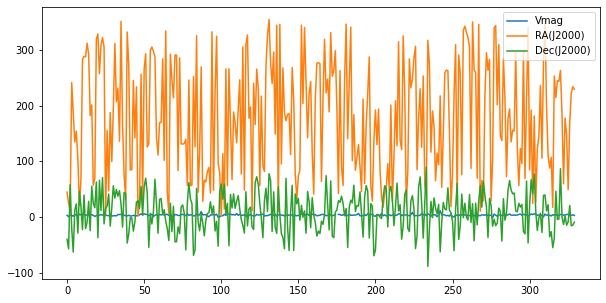

In [93]:
df.plot();

A histogram with the data is easily done:

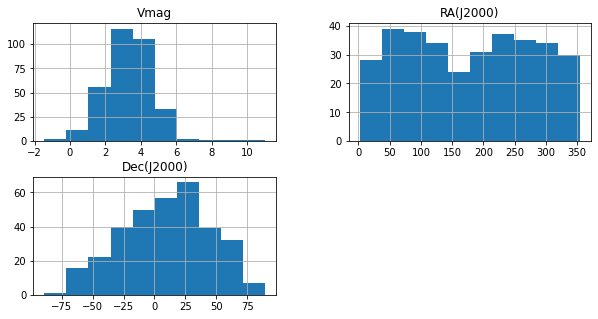

In [94]:
df.hist(); # The semi-colon does not show some extra information about the plot

We can adjust some arguments in the function to concentrate in only one of the columns,

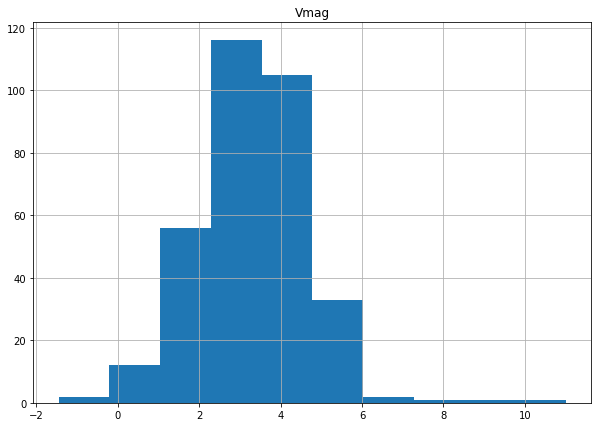

In [95]:
df.hist(column='Vmag', figsize=(10,7));

Using `matplotlib.pyplot` it is possible to customize the plot even more 

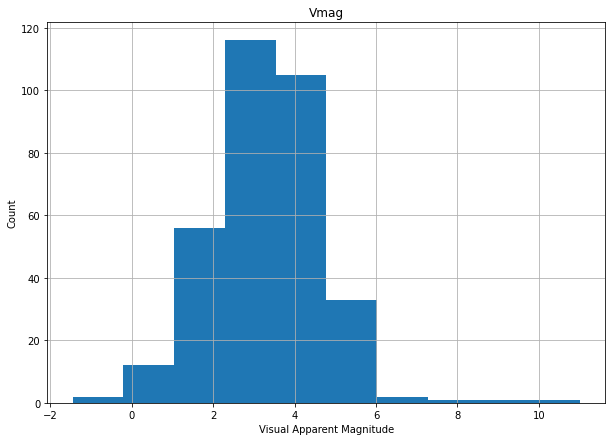

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline

ax = df.hist(column='Vmag', figsize=(10,7))
ax = ax[0]
for x in ax:
    x.set_title('Vmag')
    x.set_xlabel('Visual Apparent Magnitude')
    x.set_ylabel('Count')
plt.show()

Now, we make a scatter plot to visualise the stars in the sky according to their RA and Dec coordinates.

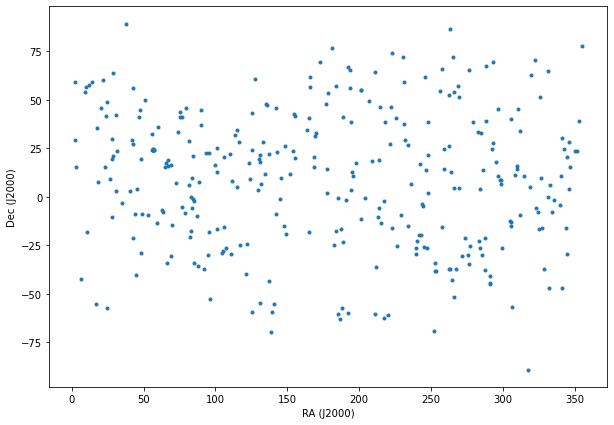

In [97]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(df['RA(J2000)'], df['Dec(J2000)'], marker='.')
ax.set_xlabel('RA (J2000)')
ax.set_ylabel('Dec (J2000)')
plt.show()

### Memory Usage of DataFrames

In [ ]:
df.info(memory_usage="deep")

### Subsampling

In [ ]:
subsample = df.sample(frac=0.1, random_state=413) 
# frac = percentage of the original set
remaining = df.drop(subsample.index)
# .index extract the indices of a dataset

In [ ]:
subsample

In [ ]:
remaining